In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体显示
plt.rcParams['axes.unicode_minus'] = False

# 供应商议价能力

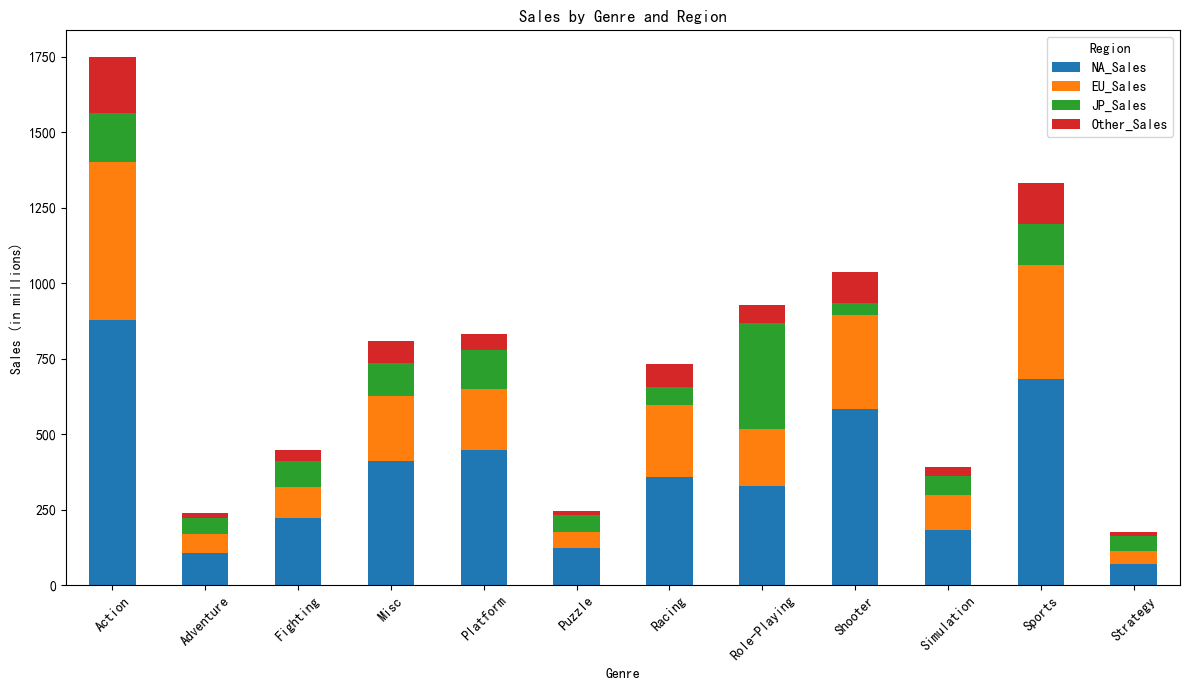

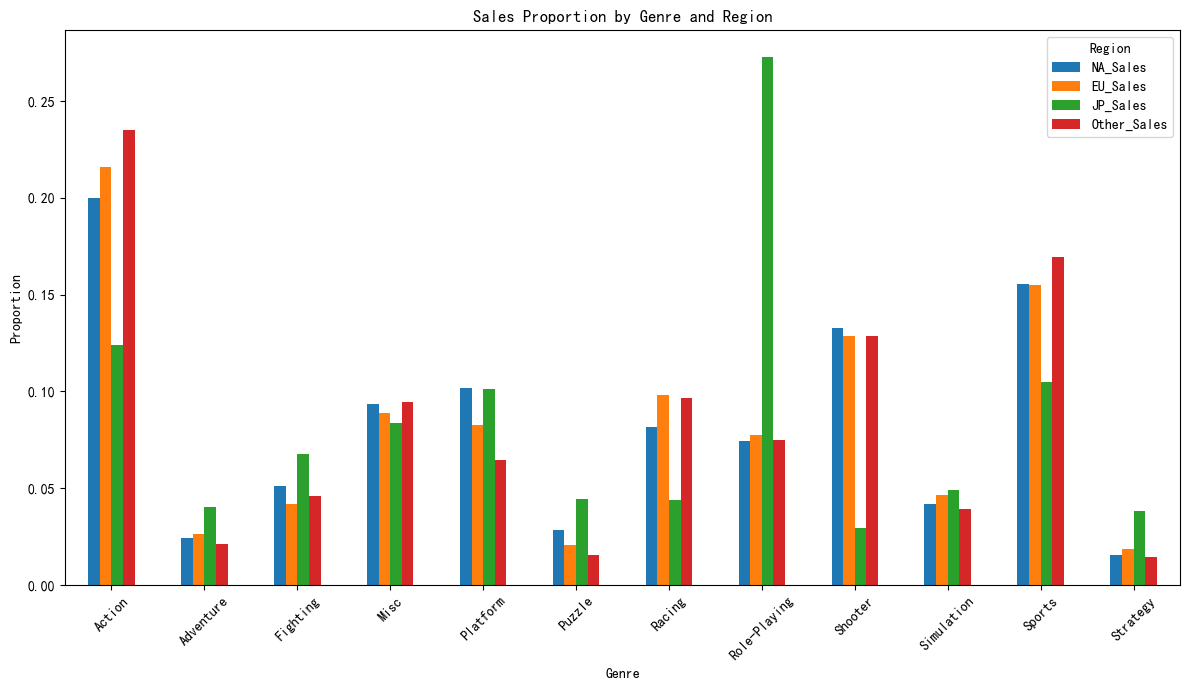

In [20]:
# 读取数据
df = pd.read_csv('vgsales.csv')

# 处理缺失值和数据清理
df = df.dropna(subset=['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

# Step 1: 按地区和游戏类型分组求和
region_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
aggregated_data = df.groupby('Genre')[region_columns].sum()

# Step 2: 可视化各地区游戏类型受欢迎程度
aggregated_data.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

# Step 3: 各地区游戏类型比例分析
region_totals = aggregated_data.sum(axis=0)
sales_proportion = aggregated_data.div(region_totals, axis=1)

# 可视化比例
sales_proportion.plot(kind='bar', figsize=(12, 7))
plt.title('Sales Proportion by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


### 波特五力模型的解释与分析

#### **代码步骤与对应图表分析：**

---

### **第一部分：按地区和游戏类型分组求和**
代码：
```python
aggregated_data = df.groupby('Genre')[region_columns].sum()
```

结果：  
生成了一个按游戏类型 (`Genre`) 分组，并按各地区 (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) 汇总销量的表。

图表1显示了不同游戏类型在各地区的销量分布，直观地展示了哪个类型在各地区最受欢迎，例如动作游戏 (Action) 明显销量领先。

---

#### **波特五力模型解释：**
- **行业竞争者**：  
  通过分析游戏类型的销量分布，可以看出不同类型的市场竞争强度。例如，动作类游戏销量远高于其他类型，表明其市场份额集中度高，竞争可能更激烈。相反，像策略类 (Strategy) 或拼图类 (Puzzle) 游戏市场份额较小，竞争者可能更少，进入门槛更低。

- **买方议价能力**：  
  各地区的销量差异（例如北美 (NA) 对动作类游戏的高偏好）表明了买方的需求差异。这种差异对发行商的内容决策有直接影响，需要为目标市场设计更符合偏好的游戏类型。

---

### **第二部分：各地区游戏类型比例分析**
代码：
```python
region_totals = aggregated_data.sum(axis=0)
sales_proportion = aggregated_data.div(region_totals, axis=1)
```

结果：  
生成了各游戏类型在不同地区占比的图表。第二张图表显示，不同地区对同一类型的偏好比例，例如，日本 (JP) 对角色扮演类游戏 (Role-Playing) 的极高偏好，而北美 (NA) 和欧洲 (EU) 更偏好动作和体育类游戏。

---

#### **波特五力模型解释：**
- **替代品威胁**：  
  游戏类型的区域偏好差异可以说明替代品在不同市场中的地位。例如，角色扮演游戏在日本的偏好度表明，这一类型可能是其他类型的强替代品。在北美，动作类游戏可能是更常见的选择，替代威胁较低。

- **行业竞争者**：  
  从比例图中可以发现，某些类型在特定市场的占比异常高，例如角色扮演游戏在日本的独占比例。这可能表明这些市场中某一类型的游戏主导地位很强，其他竞争者可能较难进入。

---

#### **整体分析建议：**
1. **地区化策略**：  
   各地区对游戏类型的需求显著不同，发行商需要为目标市场设计定制化内容。例如，在北美推广动作类和体育类游戏，而在日本市场更注重角色扮演类游戏。

2. **潜在市场挖掘**：  
   拼图类 (Puzzle) 和策略类 (Strategy) 游戏在全球市场中份额较小，但这也可能意味着这些市场尚未饱和，存在潜在的增长机会。

3. **竞争环境评估**：  
   高销量类型（例如动作和体育）需要面对更大的竞争压力，而小众市场则可能成为新进入者的突破口。

---


市场占有率：
Publisher
Nintendo                        20.069138
Electronic Arts                 12.472152
Activision                       8.168830
Sony Computer Entertainment      6.824940
Ubisoft                          5.330956
Take-Two Interactive             4.490492
THQ                              3.827085
Konami Digital Entertainment     3.184575
Sega                             3.066499
Namco Bandai Games               2.852591
Name: Global_Sales, dtype: float64


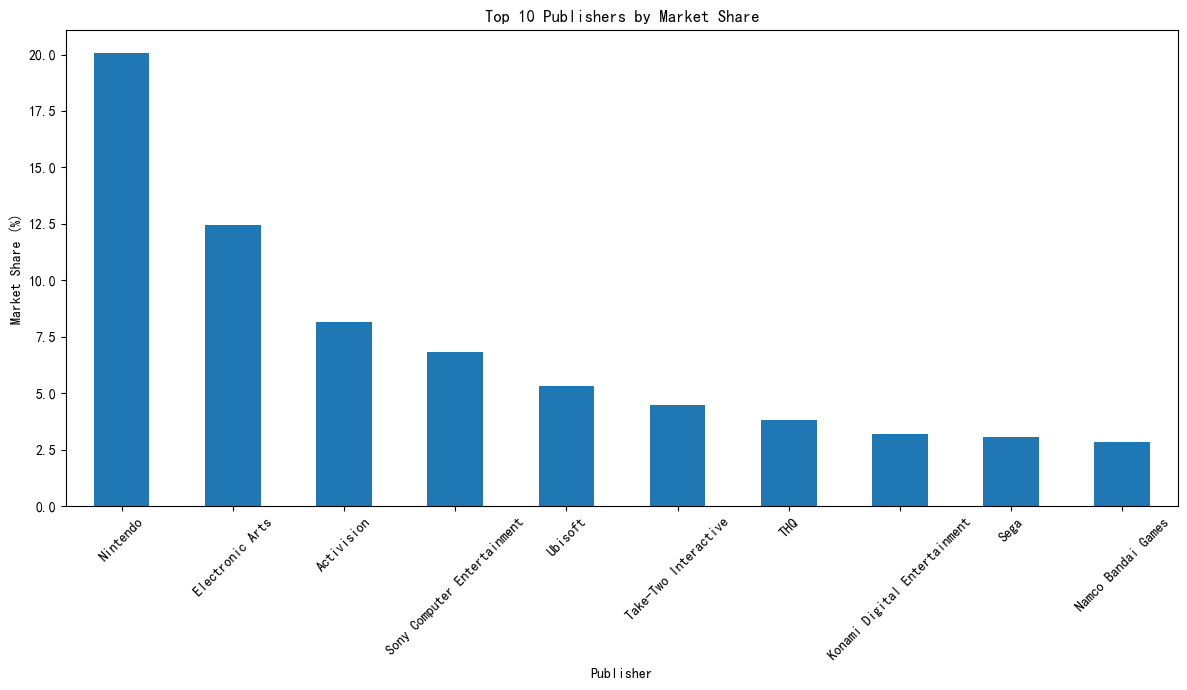

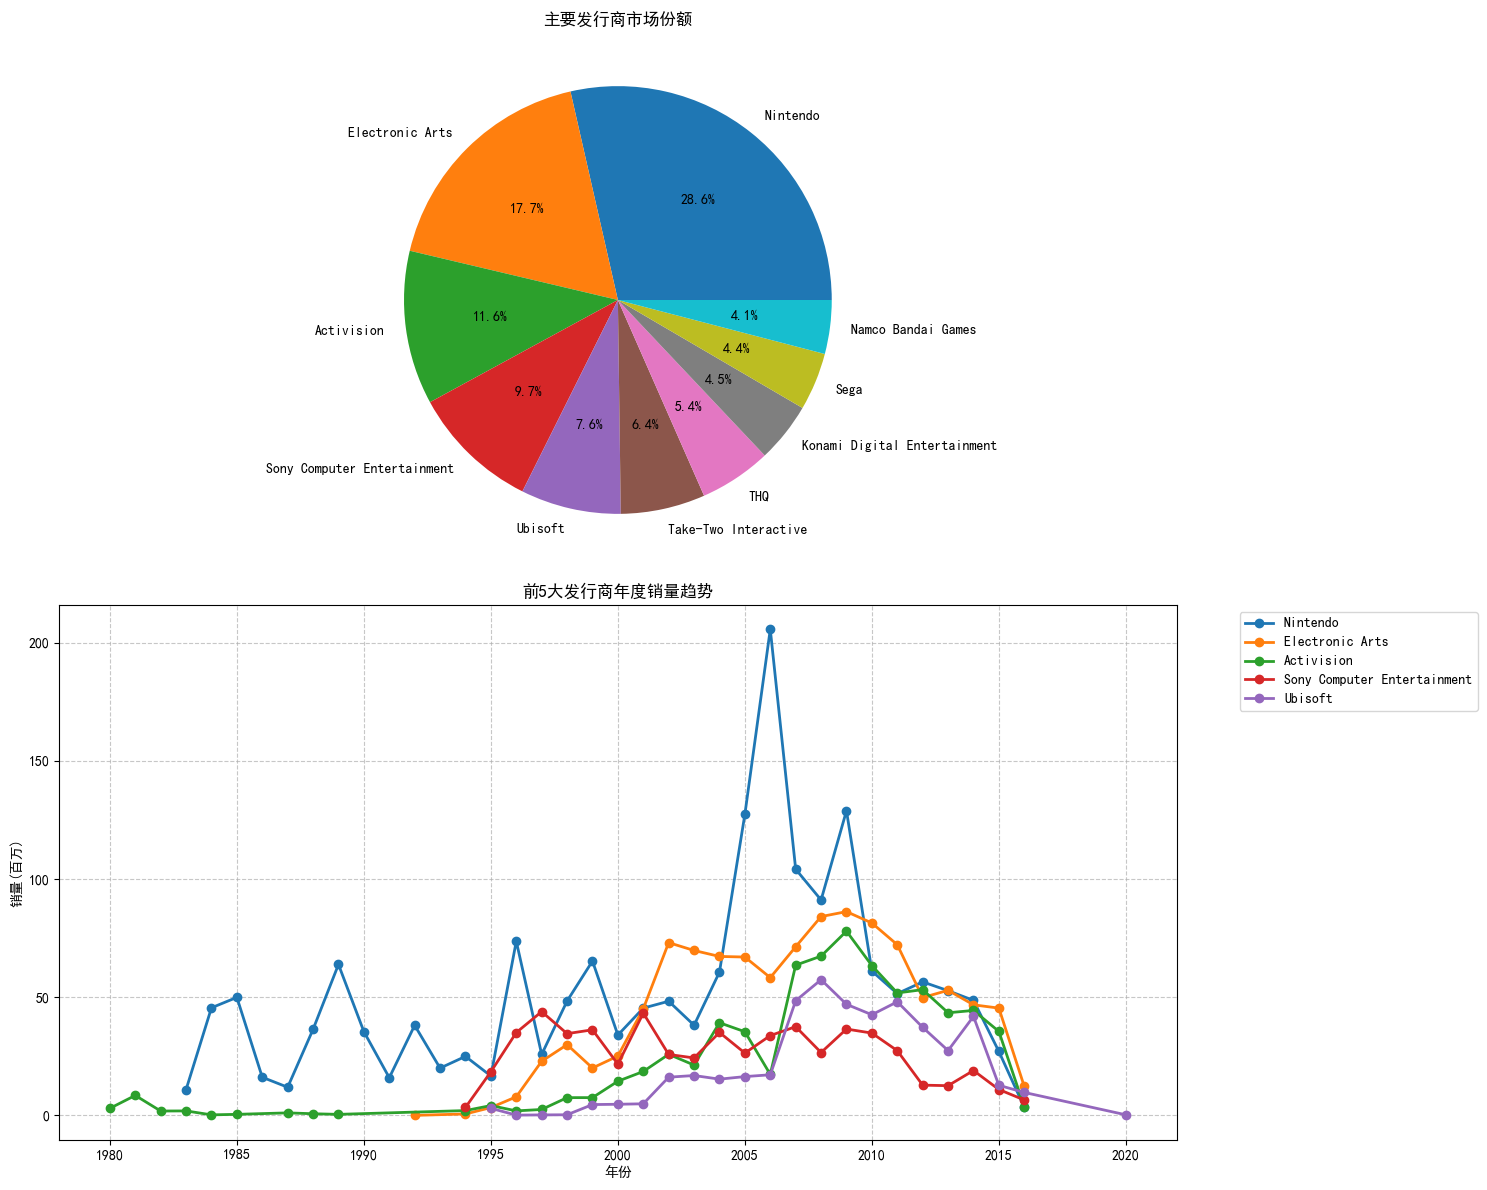

In [21]:
# Step 1: 计算每个发行商的总销售额和市场占有率
df['Global_Sales'] = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis=1)
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
total_sales = publisher_sales.sum()
publisher_sales_percentage = (publisher_sales / total_sales) * 100

# 打印市场占有率
print("市场占有率：")
print(publisher_sales_percentage.head(10))

# 可视化前10大发行商的市场占有率
top_10_publishers = publisher_sales_percentage.head(10)
top_10_publishers.plot(kind='bar', figsize=(12, 7))
plt.title('Top 10 Publishers by Market Share')
plt.xlabel('Publisher')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
def analyze_supplier_power():
    """分析游戏发行商(供应商)的市场影响力"""
    plt.figure(figsize=(15, 12))
    
    # 1.1 发行商集中度分析
    plt.subplot(211)
    publisher_share = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
    total_sales = df['Global_Sales'].sum()
    market_share = (publisher_share / total_sales * 100).round(2)
    plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%')
    plt.title('主要发行商市场份额')
    
    # 1.2 发行商销量趋势
    plt.subplot(212)
    # 获取前5大发行商
    top_publishers = market_share.head().index.tolist()
    
    # 创建年度销量趋势数据
    publisher_trends = df[df['Publisher'].isin(top_publishers)].groupby(['Year', 'Publisher'])['Global_Sales'].sum().reset_index()
    
    # 确保年份是数值类型且按年份排序
    publisher_trends['Year'] = pd.to_numeric(publisher_trends['Year'], errors='coerce')
    publisher_trends = publisher_trends.sort_values('Year')
    
    # 为每个发行商绘制单独的线条
    for publisher in top_publishers:
        data = publisher_trends[publisher_trends['Publisher'] == publisher]
        plt.plot(data['Year'], data['Global_Sales'], 
                marker='o', 
                label=publisher, 
                linewidth=2,
                markersize=6)
    
    plt.title('前5大发行商年度销量趋势')
    plt.xlabel('年份')
    plt.ylabel('销量(百万)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
analyze_supplier_power()

# 行业竞争者

In [22]:

# Step 2: 计算市场竞争态势 (HHI 指数)
# HHI = ∑(市场占有率^2)
hhi = (publisher_sales_percentage ** 2).sum()
print(f"Herfindahl-Hirschman Index (HHI): {hhi:.2f}")
# 行业竞争分析
def analyze_competition():
    """分析行业内部竞争状况"""
    # 5.1 计算行业集中度
    publisher_sales = df.groupby('Publisher')['Global_Sales'].sum()
    total_sales = df['Global_Sales'].sum()
    market_shares = (publisher_sales / total_sales * 100)
    hhi = (market_shares ** 2).sum()
    
    # 5.2 生成竞争分析报告
    print("游戏行业竞争分析报告")
    print("-" * 50)
    print(f"行业HHI指数: {hhi:.2f}")
    print(f"活跃发行商数量: {len(publisher_sales)}")
    print("\n市场份额前五的发行商:")
    print(market_shares.sort_values(ascending=False).head())
    print("\n各类型游戏市场份额:")
    print(df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False))
analyze_competition()

Herfindahl-Hirschman Index (HHI): 793.44
游戏行业竞争分析报告
--------------------------------------------------
行业HHI指数: 790.80
活跃发行商数量: 578

市场份额前五的发行商:
Publisher
Nintendo                       20.035779
Electronic Arts                12.451421
Activision                      8.155252
Sony Computer Entertainment     6.813596
Ubisoft                         5.322095
Name: Global_Sales, dtype: float64

各类型游戏市场份额:
Genre
Action          1750.16
Sports          1330.54
Shooter         1036.84
Role-Playing     927.26
Platform         831.04
Misc             809.30
Racing           731.77
Fighting         448.94
Simulation       391.91
Puzzle           244.42
Adventure        238.81
Strategy         174.86
Name: Global_Sales, dtype: float64


头部发行商：
Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment', 'Ubisoft', 'Take-Two Interactive',
       'THQ'],
      dtype='object', name='Publisher')
尾部发行商数量： 571


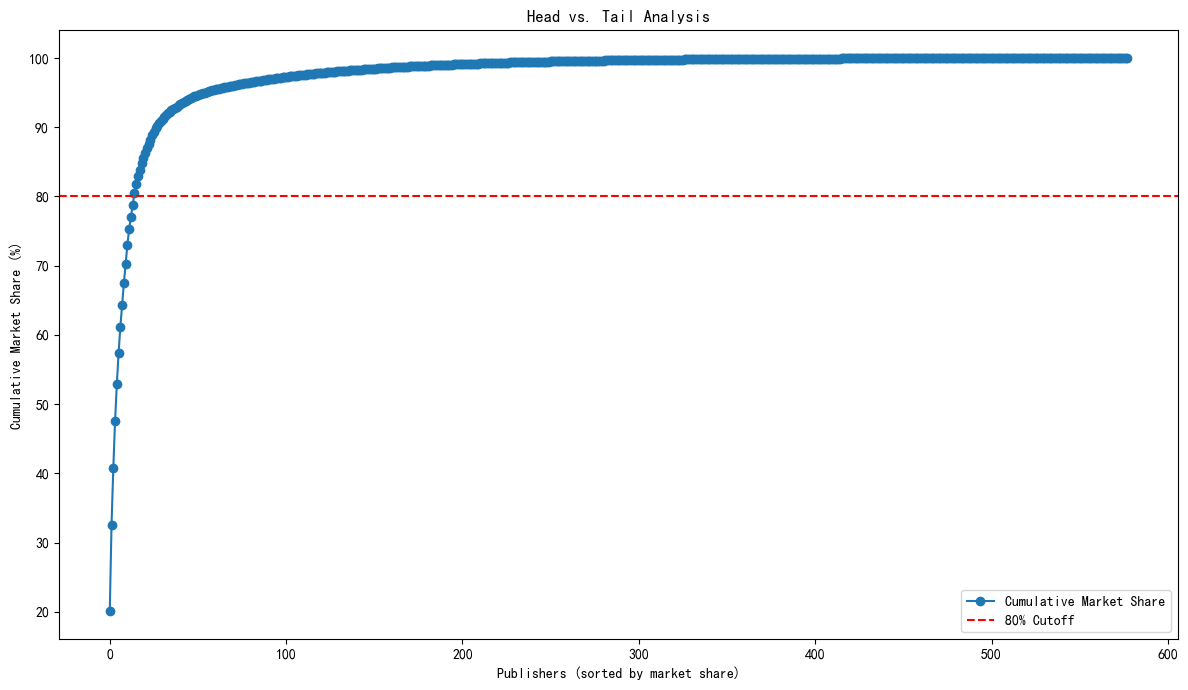

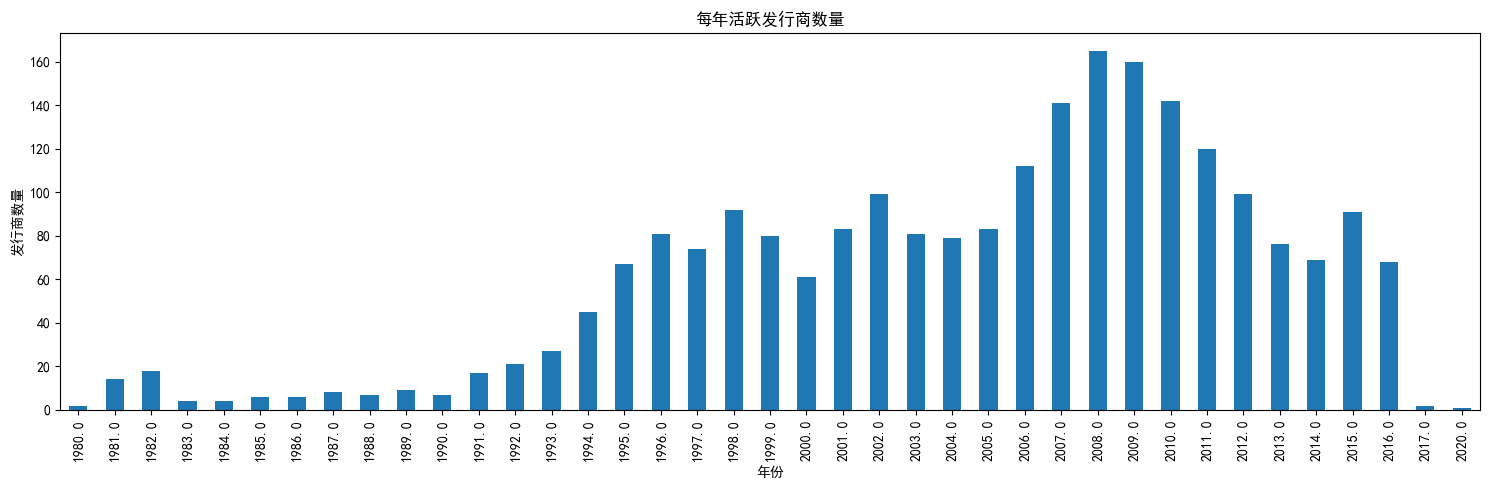

In [23]:

# Step 3: 头部与长尾分析
# 定义头部和长尾
top_publishers_cutoff = 0.8  # 80%的市场份额
cumulative_share = publisher_sales_percentage.cumsum()

head_publishers = cumulative_share[cumulative_share <= 80*top_publishers_cutoff].index
tail_publishers = cumulative_share[cumulative_share > 80*top_publishers_cutoff].index

print("头部发行商：")
print(head_publishers)
print("尾部发行商数量：", len(tail_publishers))

# 可视化头部和长尾
plt.figure(figsize=(12, 7))
plt.plot(cumulative_share.values, label='Cumulative Market Share', marker='o')
plt.axhline(y=top_publishers_cutoff * 100, color='r', linestyle='--', label='80% Cutoff')
plt.title('Head vs. Tail Analysis')
plt.xlabel('Publishers (sorted by market share)')
plt.ylabel('Cumulative Market Share (%)')
plt.legend()
plt.tight_layout()
plt.show()
# 新进入者威胁分析
def analyze_new_entrants():
    """分析行业准入门槛和新进入者情况"""
    plt.figure(figsize=(15, 5))
    
    # 4.1 每年新发行商数量
    yearly_publishers = df.groupby('Year')['Publisher'].nunique()
    yearly_publishers.plot(kind='bar')
    plt.title('每年活跃发行商数量')
    plt.xlabel('年份')
    plt.ylabel('发行商数量')
    
    plt.tight_layout()
    plt.show()
analyze_new_entrants()

# 购买者议价能力

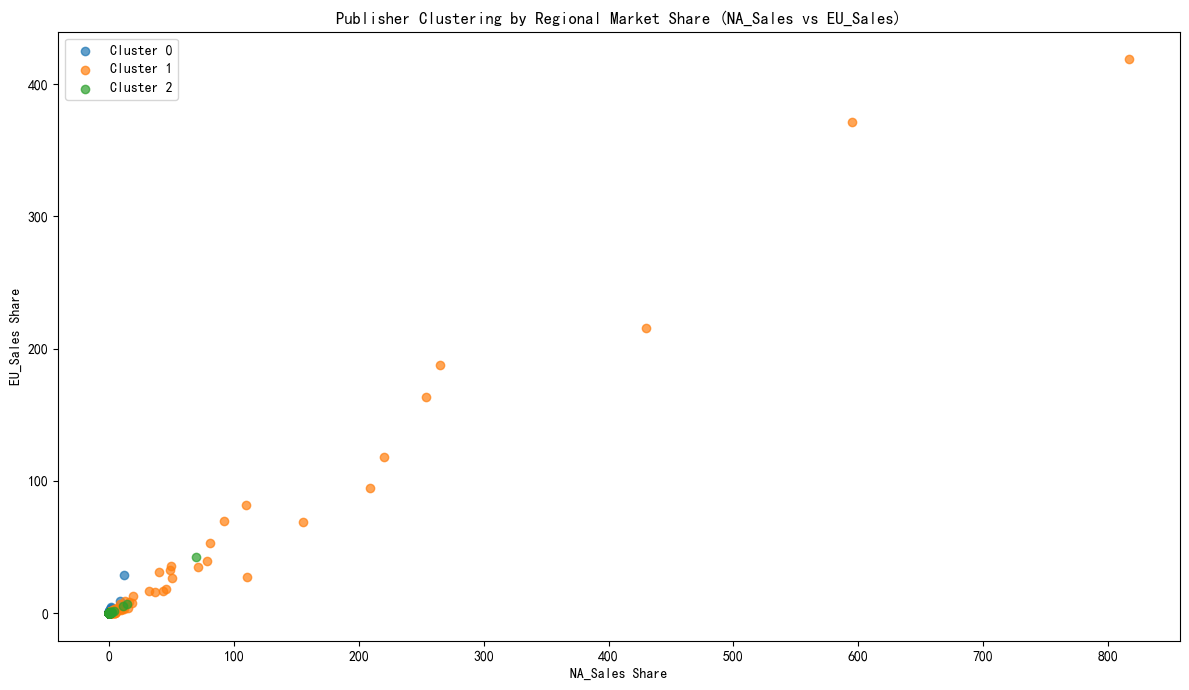

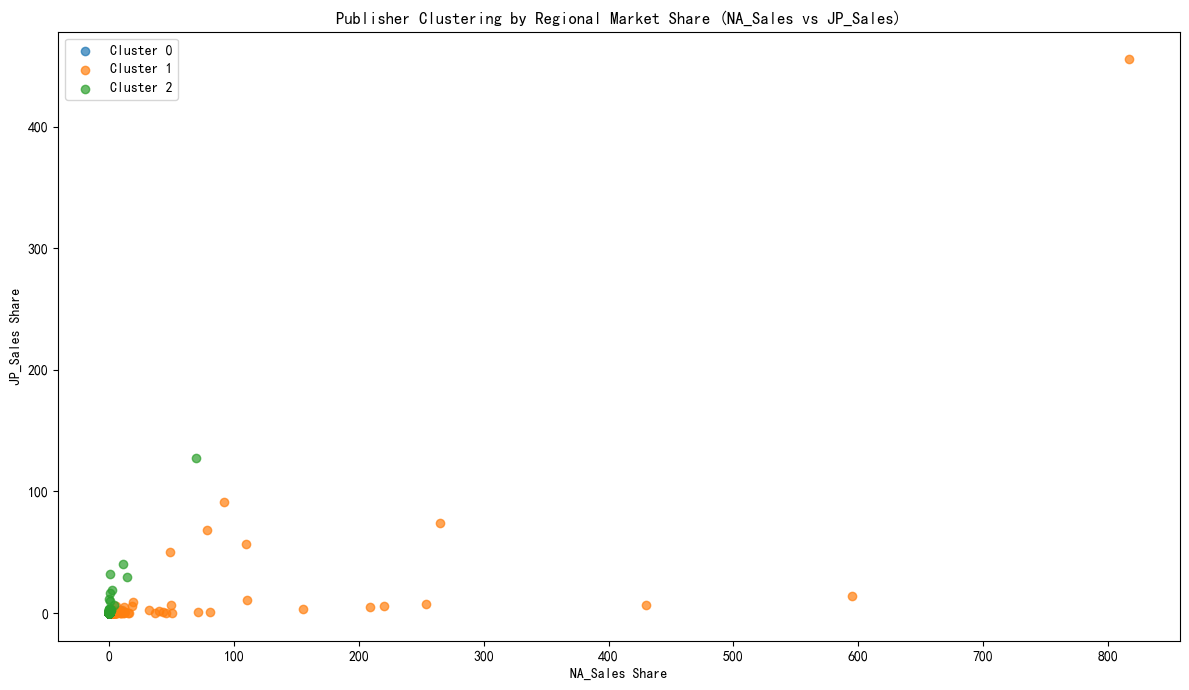

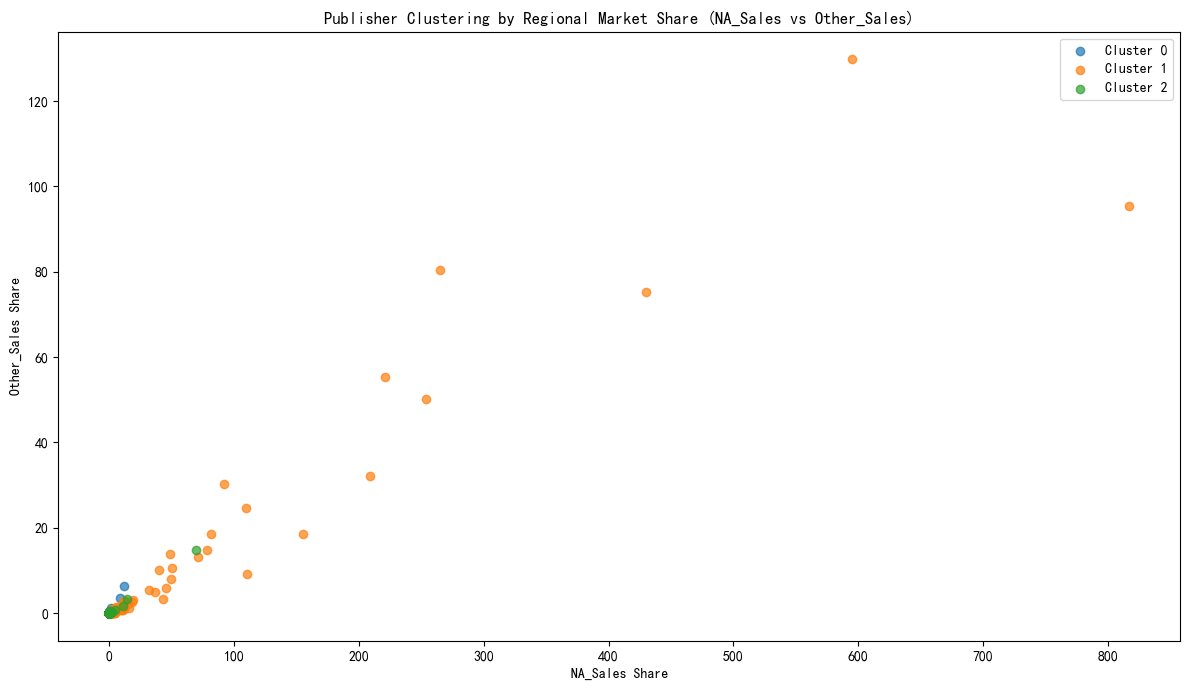

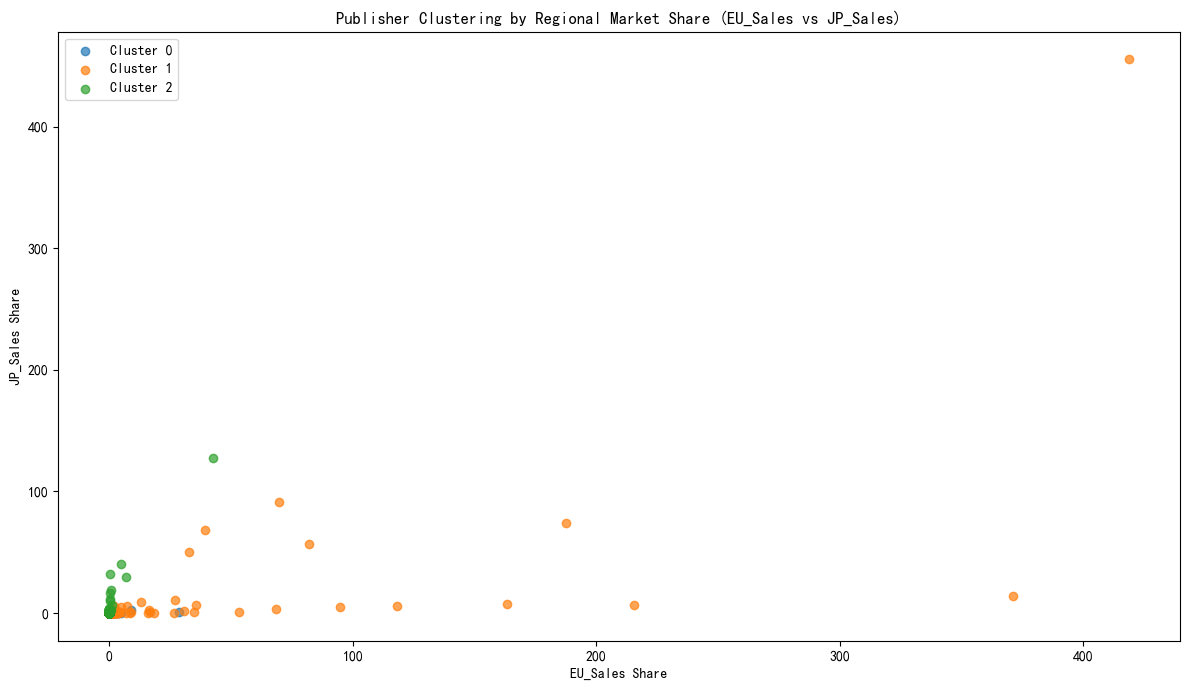

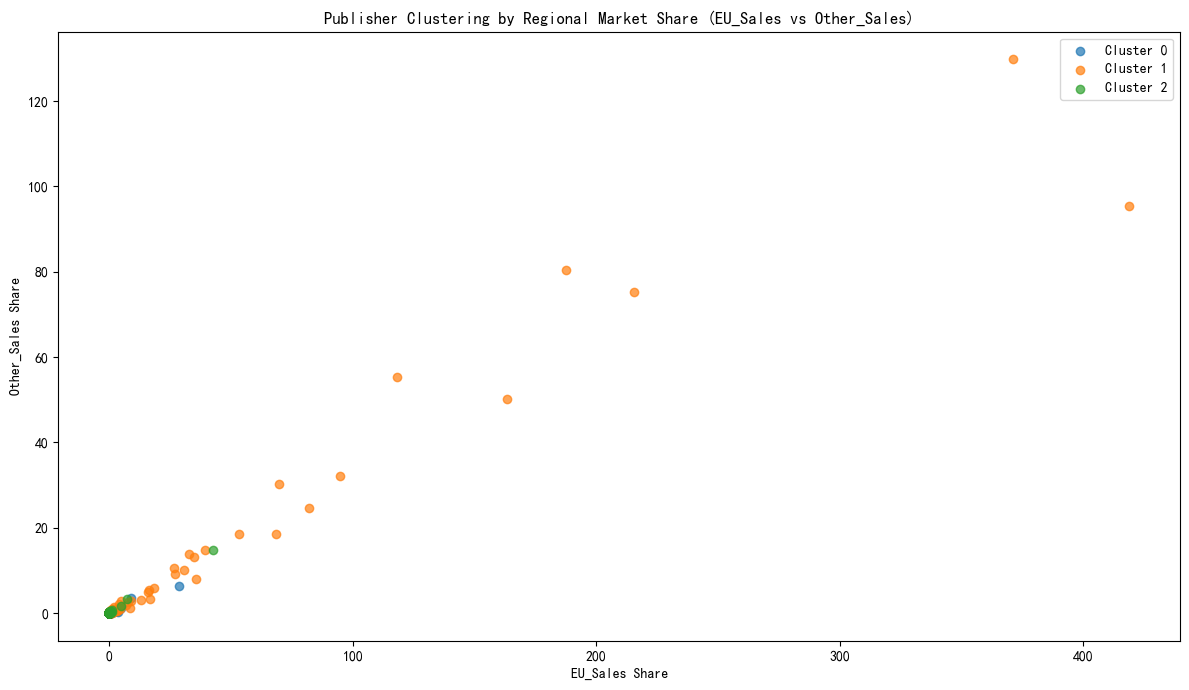

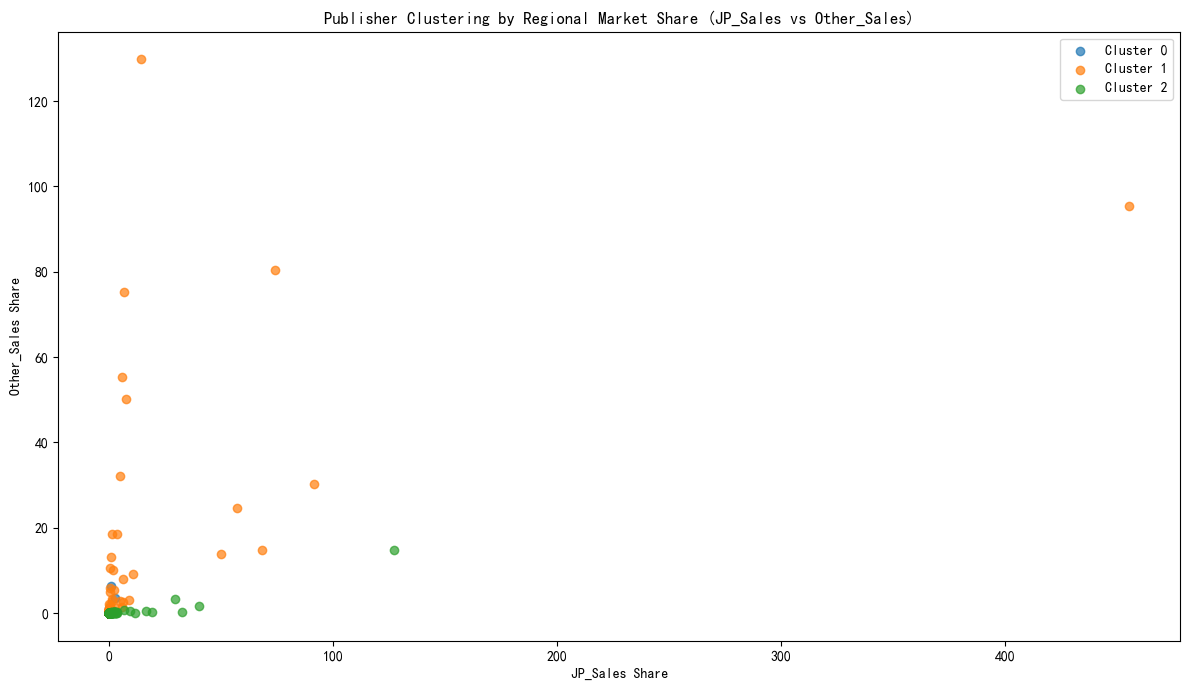

In [24]:
# Step 4: 可选 - 按市场规模和地区偏好进行聚类分析
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 为聚类准备数据：每个发行商的区域销售占比
region_sales = df.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales['Global_Sales'] = region_sales.sum(axis=1)
region_sales_percentage = region_sales.div(region_sales['Global_Sales'], axis=0)  # 计算各区域销售占比

# 标准化数据
scaler = StandardScaler()
scaled_data = scaler.fit_transform(region_sales_percentage[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']])

# 使用K-Means聚类
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled_data)
region_sales['Cluster'] = kmeans.labels_

# 两两组合变量可视化
variables = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
combinations_list = list(combinations(variables, 2))  # 生成两两组合

# 可视化每个组合的聚类结果
for var1, var2 in combinations_list:
    plt.figure(figsize=(12, 7))
    for cluster in range(3):
        cluster_data = region_sales[region_sales['Cluster'] == cluster]
        plt.scatter(cluster_data[var1], cluster_data[var2], label=f'Cluster {cluster}', alpha=0.7)
    plt.title(f'Publisher Clustering by Regional Market Share ({var1} vs {var2})')
    plt.xlabel(f'{var1} Share')
    plt.ylabel(f'{var2} Share')
    plt.legend()
    plt.tight_layout()
    plt.show()
# # 保存结果到文件
# publisher_sales_percentage.to_csv('publisher_market_share.csv', header=True)
# region_sales.to_csv('publisher_clusters.csv', header=True)

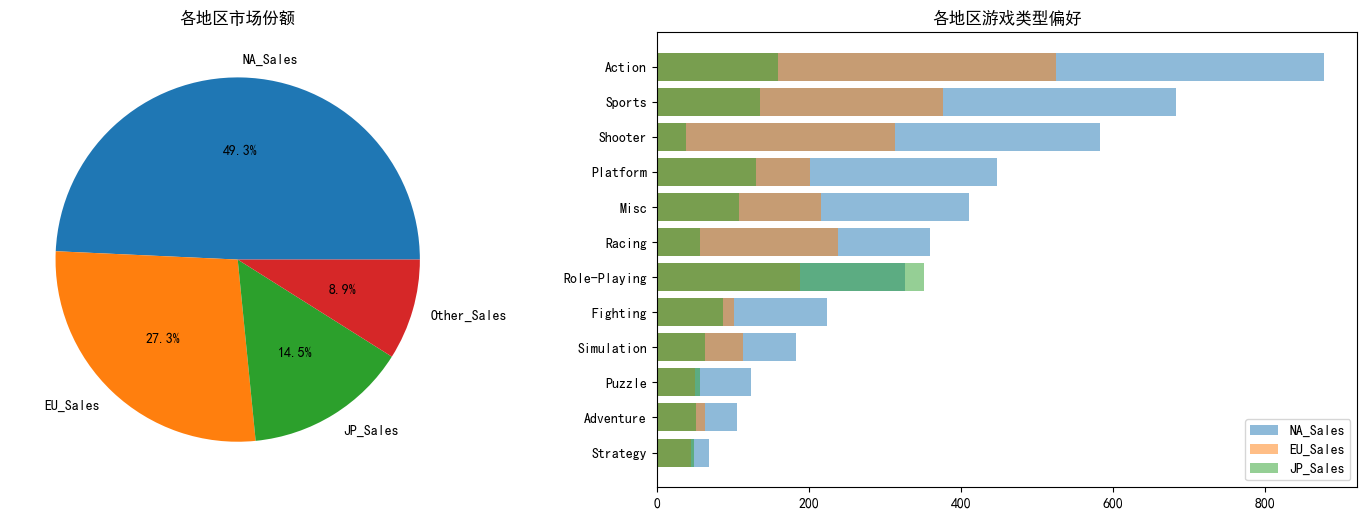

In [25]:
def analyze_buyer_power():
    """分析不同地区市场的购买力特征"""
    plt.figure(figsize=(15, 10))
    
    # 2.1 地区市场份额
    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    region_sales = df[regions].sum()
    plt.subplot(221)
    plt.pie(region_sales, labels=regions, autopct='%1.1f%%')
    plt.title('各地区市场份额')
    
    # 2.2 地区游戏类型偏好
    plt.subplot(222)
    for region in regions[:3]:  # 排除Other_Sales
        genre_sales = df.groupby('Genre')[region].sum().sort_values(ascending=True)
        plt.barh(genre_sales.index, genre_sales.values, alpha=0.5, label=region)
    plt.title('各地区游戏类型偏好')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
analyze_buyer_power()

平台与类型分布数据透视表：
Genre     Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Platform                                                                  
2600       29.25       1.70      1.24    3.57     13.26   14.69    2.91   
3DO         0.00       0.06      0.00    0.00      0.00    0.02    0.00   
3DS        56.91       4.82     10.44   10.47     32.25    5.56   14.51   
DC          1.26       2.50      1.83    0.00      2.53    0.00    2.65   
DS        115.38      47.30      7.20  137.72     77.39   83.98   38.59   
GB          7.93      17.15      0.00   13.35     54.91   47.47    4.55   
GBA        55.66      14.63      4.16   36.09     78.21   12.81   18.81   
GC         37.70       5.93     18.43   16.72     28.59    4.69   21.87   
GEN         2.74       0.19      5.89    0.03     15.44    0.00    0.26   
GG          0.00       0.00      0.00    0.00      0.04    0.00    0.00   
N64        29.54       0.45     22.11   11.20     36.10    3.39   40.01   
NES        

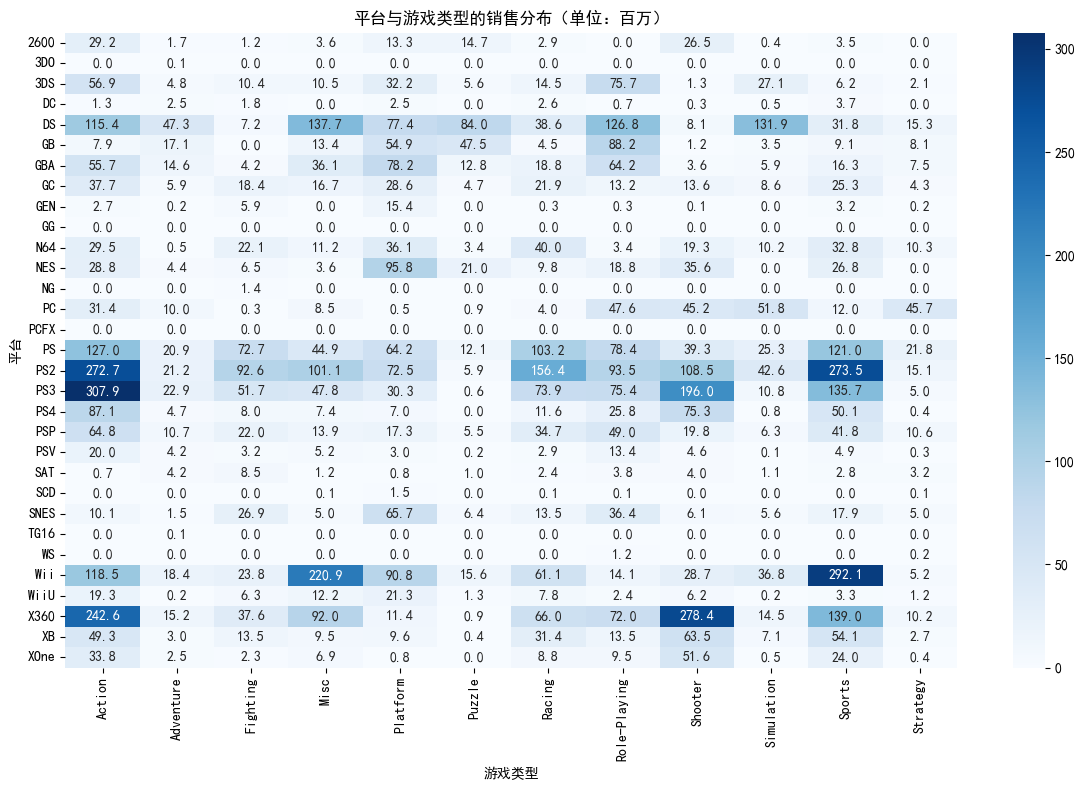

每个平台主导游戏类型比例：
Platform
GG      1.000000
PCFX    1.000000
NG      0.986111
TG16    0.875000
WS      0.859155
SCD     0.806452
3DO     0.600000
GEN     0.544621
NES     0.381518
XOne    0.365627
GB      0.345416
SNES    0.328184
PSV     0.322732
PS3     0.321415
Wii     0.315393
PS4     0.313057
3DS     0.306100
2600    0.301609
X360    0.284238
WiiU    0.259934
SAT     0.253945
XB      0.246528
GBA     0.246059
DC      0.228840
PSP     0.218655
PS2     0.217779
PC      0.200822
GC      0.189514
N64     0.182961
PS      0.173800
DS      0.167653
dtype: float64
Chi-Square 统计量: 5152.33, 自由度: 330, p值: 0.00000
结论: 平台与游戏类型之间存在显著相关性。
分层分析（主机类型）：
Genre          Action  Adventure  Fighting    Misc  Platform  Puzzle  Racing  \
Platform_Type                                                                  
Console        843.04      70.08    153.18  394.23    177.66   22.20  265.85   
Handheld       257.05      66.97     42.80  167.33    129.91   95.20   90.75   
Other          618.68      91.73  

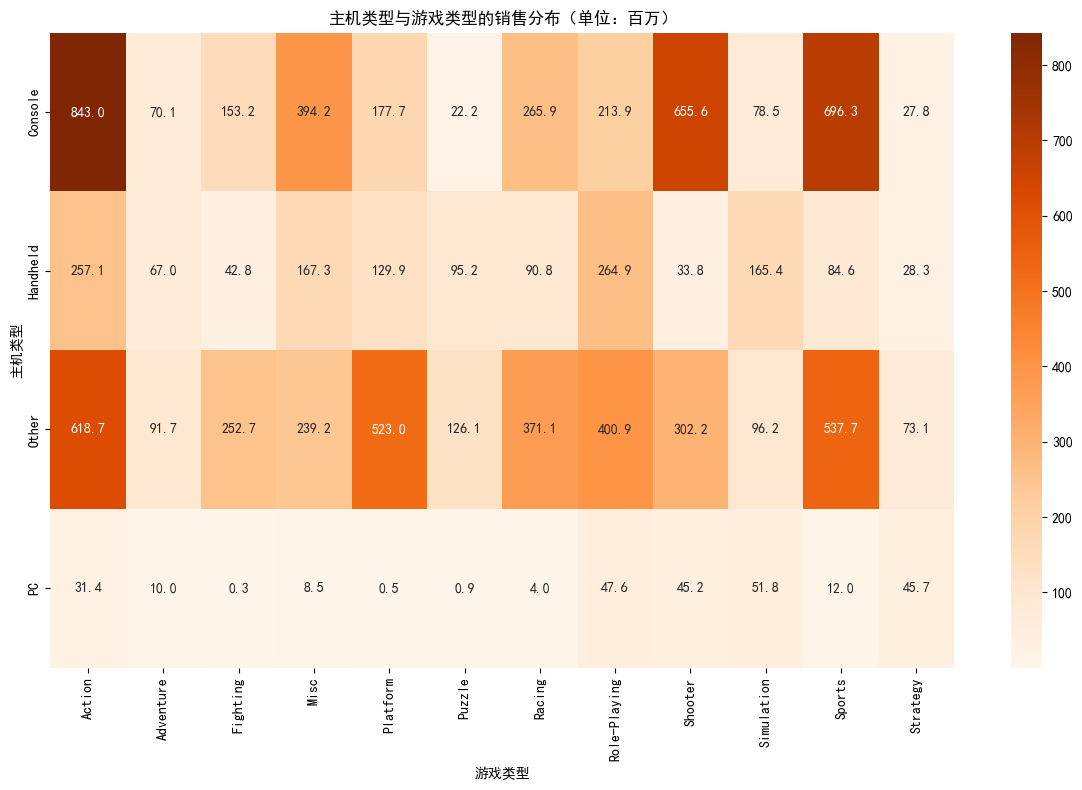

In [26]:
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: 数据透视表 - 平台与游戏类型分布
pivot_table = df.pivot_table(
    values='Global_Sales',
    index='Platform',
    columns='Genre',
    aggfunc='sum',
    fill_value=0
)

print("平台与类型分布数据透视表：")
print(pivot_table)

# Step 2: 热力图可视化平台与游戏类型的相关性
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    cmap='Blues',
    annot=True,
    fmt='.1f',
    cbar=True
)
plt.title('平台与游戏类型的销售分布（单位：百万）')
plt.xlabel('游戏类型')
plt.ylabel('平台')
plt.tight_layout()
plt.show()

# Step 3: 类型集中度分析
# 计算每个平台中占主导的游戏类型比例
platform_domination = pivot_table.div(pivot_table.sum(axis=1), axis=0).max(axis=1).sort_values(ascending=False)

print("每个平台主导游戏类型比例：")
print(platform_domination)

# Step 4: Chi-Square测试 - 检验平台与类型的相关性
chi2_data = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().unstack(fill_value=0)
chi2_stat, p, dof, expected = chi2_contingency(chi2_data)

print(f"Chi-Square 统计量: {chi2_stat:.2f}, 自由度: {dof}, p值: {p:.5f}")
if p < 0.05:
    print("结论: 平台与游戏类型之间存在显著相关性。")
else:
    print("结论: 平台与游戏类型之间没有显著相关性。")

# Step 5: 分层分析 - 细分主机类型
# 定义平台类型
platform_types = {
    'Console': ['PS4', 'PS3', 'X360', 'XB', 'Wii', 'GC'],
    'Handheld': ['3DS', 'DS', 'PSP', 'PSV'],
    'PC': ['PC']
}
df['Platform_Type'] = df['Platform'].map(lambda x: next((k for k, v in platform_types.items() if x in v), 'Other'))

# 透视表 - 分层分析
platform_type_pivot = df.pivot_table(
    values='Global_Sales',
    index='Platform_Type',
    columns='Genre',
    aggfunc='sum',
    fill_value=0
)

print("分层分析（主机类型）：")
print(platform_type_pivot)

# 可视化分层分析
plt.figure(figsize=(12, 8))
sns.heatmap(
    platform_type_pivot,
    cmap='Oranges',
    annot=True,
    fmt='.1f',
    cbar=True
)
plt.title('主机类型与游戏类型的销售分布（单位：百万）')
plt.xlabel('游戏类型')
plt.ylabel('主机类型')
plt.tight_layout()
plt.show()

In [27]:
# df['Year'] = df['Year'].astype(int)  # 确保年份为整数
df = df[df['Year'] >= 1980]  # 仅保留有效年份

# 定义代际：每 5 年为一代
df['Generation'] = (df['Year'] - 1980) // 5
df['Generation'] = df['Generation'] * 5 + 1980  # 转换为起始年份标记
# 计算每个平台在每代的总销售额
platform_sales = df.groupby(['Generation', 'Platform'])['Global_Sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by=['Generation', 'Global_Sales'], ascending=[True, False])

# 找出每代最受欢迎的平台
top_platforms_per_gen = platform_sales.groupby('Generation').first().reset_index()
print("每代最受欢迎的平台：")
print(top_platforms_per_gen)

每代最受欢迎的平台：
   Generation Platform  Global_Sales
0      1980.0     2600         82.05
1      1985.0      NES        162.47
2      1990.0     SNES        150.45
3      1995.0       PS        580.85
4      2000.0      PS2        807.10
5      2005.0      Wii        676.95
6      2010.0      PS3        581.55
7      2015.0      PS4        154.57
8      2020.0       DS          0.29


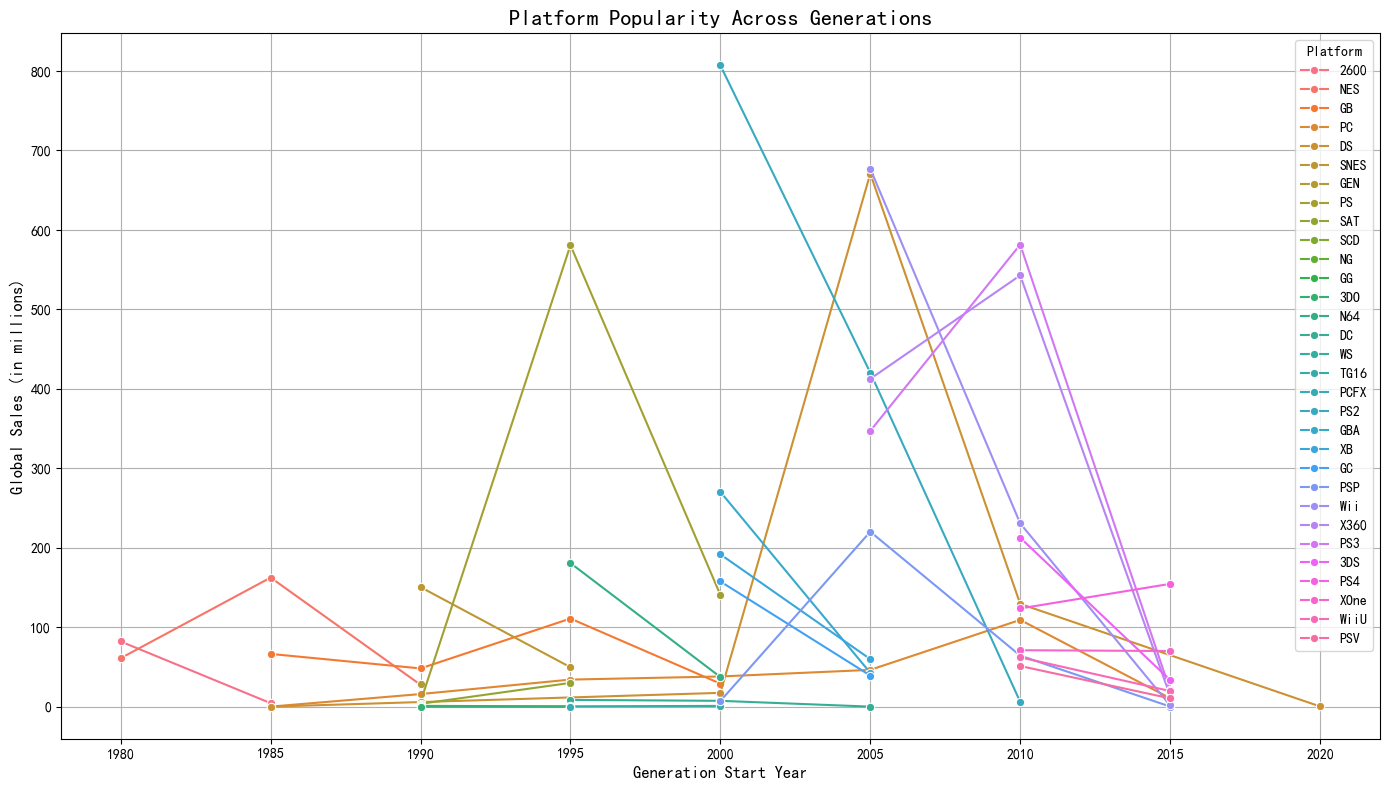

In [28]:
import seaborn as sns

# 可视化销售趋势
plt.figure(figsize=(14, 8))
sns.lineplot(data=platform_sales, x='Generation', y='Global_Sales', hue='Platform', marker='o')
plt.title('Platform Popularity Across Generations', fontsize=16)
plt.xlabel('Generation Start Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.legend(title='Platform', loc='upper right', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

## 替代品威胁分析

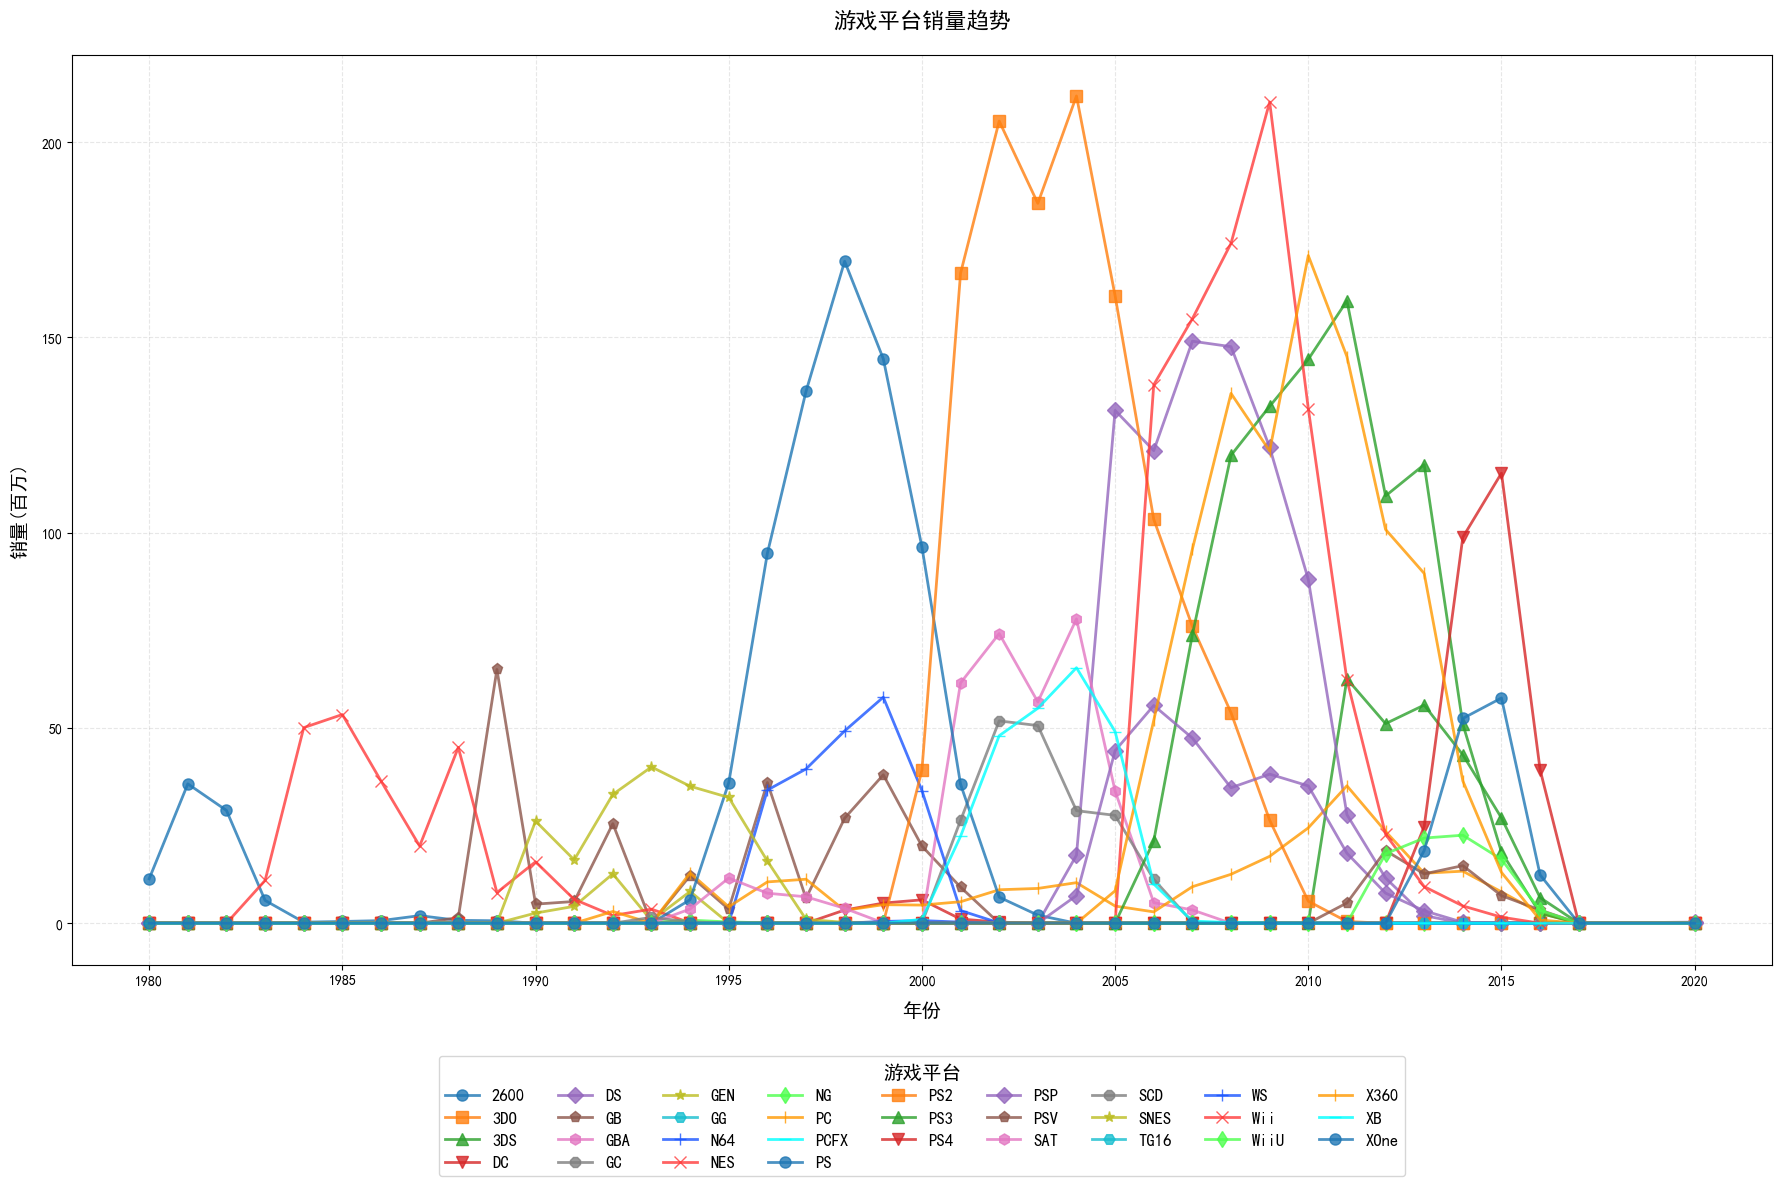

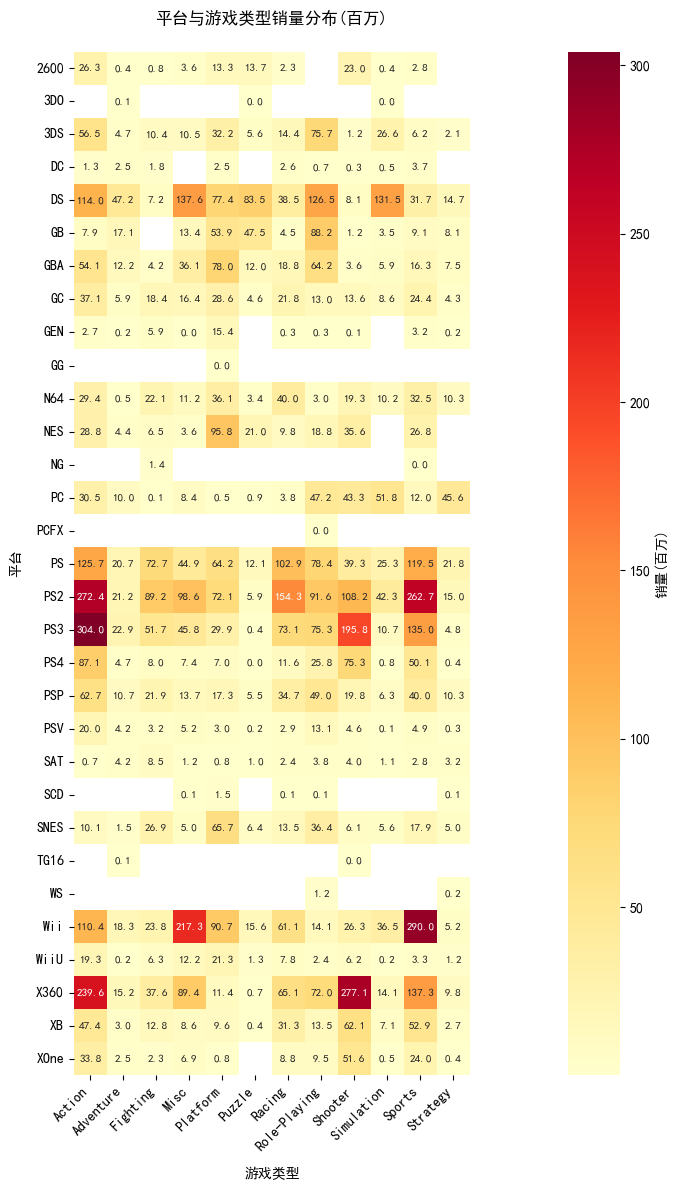

In [29]:
def analyze_substitutes():
    """分析游戏平台和类型的替代关系"""
    plt.figure(figsize=(20, 14))
    
    ax = plt.gca()
    ax.set_position([0.1, 0.25, 0.85, 0.65])
    
    platform_sales = df.pivot_table(
        values='Global_Sales',
        index='Year',
        columns='Platform',
        aggfunc='sum'
    ).fillna(0)
    
    # 定义不同的标记形状
    markers = ['o', 's', '^', 'v', 'D', 'p', 'h', '8', '*', 'H', '+', 'x', 'd', '|', '_']
    # 定义清晰的颜色方案
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
             '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
             '#1a55FF', '#ff3b3b', '#4dff4d', '#ff9900', '#00ffff']
    
    # 为每个平台分别绘制曲线
    for idx, platform in enumerate(platform_sales.columns):
        marker_idx = idx % len(markers)  # 循环使用标记
        color_idx = idx % len(colors)    # 循环使用颜色
        
        platform_sales[platform].plot(
            ax=ax,
            marker=markers[marker_idx],    # 使用不同的标记形状
            markersize=8,                  # 增大标记大小
            linewidth=2,
            color=colors[color_idx],       # 使用不同的颜色
            label=platform,
            alpha=0.8
        )
    
    plt.title('游戏平台销量趋势', fontsize=16, pad=20)
    plt.xlabel('年份', fontsize=14, labelpad=10)
    plt.ylabel('销量(百万)', fontsize=14, labelpad=10)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # 调整图例
    plt.legend(
        bbox_to_anchor=(0.5, -0.1),
        loc='upper center',
        ncol=9,
        fontsize=12,
        title='游戏平台',
        title_fontsize=14,
        borderaxespad=0.
    )
    
    plt.show()
    
    # 3.2 游戏类型分布(单独放大的热力图)
    plt.figure(figsize=(20, 12))  # 显著增加图表大小
    genre_platform = df.pivot_table(
        values='Global_Sales',
        index='Platform',
        columns='Genre',
        aggfunc='sum'
    )
    
    # 调整热力图参数
    sns.heatmap(genre_platform, 
                cmap='YlOrRd',
                annot=True,          # 显示数值
                fmt='.1f',           # 数值格式化为1位小数
                square=True,         # 单元格为正方形
                cbar_kws={'label': '销量(百万)'},  # 添加颜色条标签
                annot_kws={'size': 8}  # 调整数字大小
    )
    
    plt.title('平台与游戏类型销量分布(百万)', pad=20)  # 增加标题与图表的间距
    plt.xlabel('游戏类型', labelpad=10)  # 增加轴标签与图表的间距
    plt.ylabel('平台', labelpad=10)
    
    # 调整标签角度以防重叠
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()  # 自动调整布局
    plt.show()
analyze_substitutes()

## 新进入者威胁

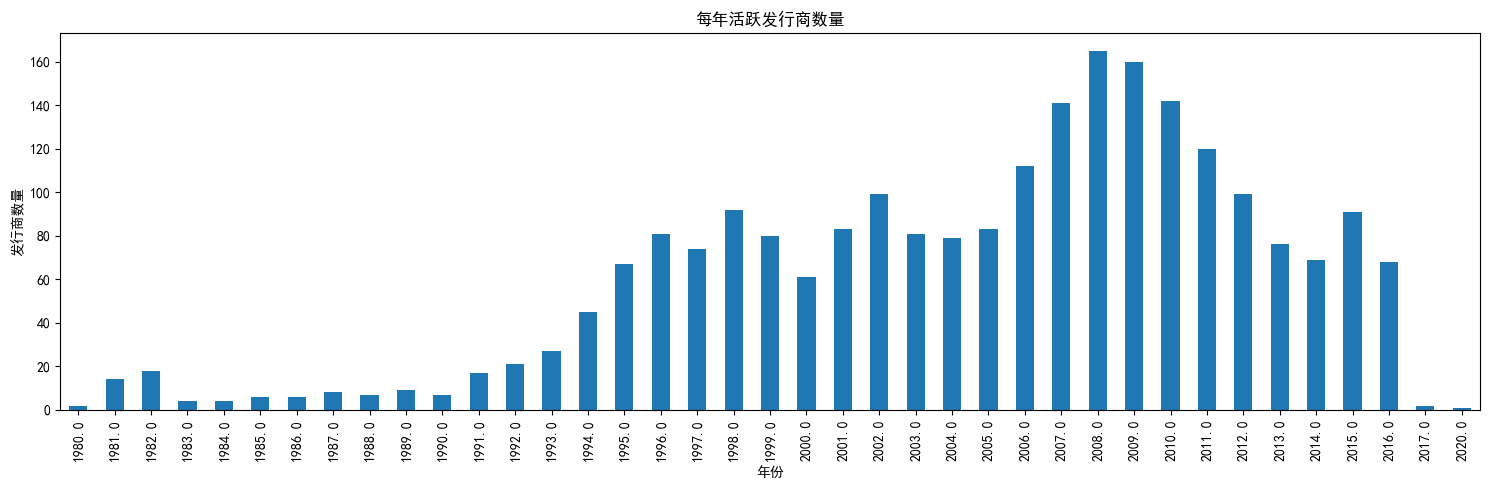

In [30]:
def analyze_new_entrants():
    """分析行业准入门槛和新进入者情况"""
    plt.figure(figsize=(15, 5))
    
    # 4.1 每年新发行商数量
    yearly_publishers = df.groupby('Year')['Publisher'].nunique()
    yearly_publishers.plot(kind='bar')
    plt.title('每年活跃发行商数量')
    plt.xlabel('年份')
    plt.ylabel('发行商数量')
    
    plt.tight_layout()
    plt.show()
analyze_new_entrants()